Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

En éste projecto se realizará un análisis de de las tarifas para conocer el comportamiento de los clientes en cada una de ellas, así como determinar qué tarifa genera más ingresos para la empresa. Esta información es importante ya que le podrá ayudar a la empresa en la toma de desciciones en lo que refiere a estos planes y tarifas, para poder generar más ingresos y también dar un mejor servicio a los usuarios.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np 
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns




## Cargar datos

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


In [2]:
# Carga los archivos de datos en diferentes DataFrames


calls_df = pd.read_csv('/datasets/megaline_calls.csv')

internet_df = pd.read_csv('/datasets/megaline_internet.csv')

messages_df = pd.read_csv('/datasets/megaline_messages.csv')

plans_df = pd.read_csv('/datasets/megaline_plans.csv')

users_df = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
internet_df.info()
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
messages_df.info()
messages_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
plans_df.info()
plans_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
users_df.info()
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas

print(plans_df)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


En la información general vemos que hay 8 columnas que nos indican las características de las tarifas. Las filas representan las tarifas, surf y ultimate. Un problema que surge es que el internet incluido por mes está en mb, mientras que en la información se nos dá en gb. También el cargo por internet extra está en gb, por lo que podemos convertir la columna de mb_per_month_included para que esté en la unidad correcta. Antes de hacer esta conversión es importante corroborar con la empresa que los datos sean correctos. 
Al realizar el resto del proyecto, podemos ver que en los usarios se mide el consumo en mb, por lo que es más conveniente dejar en mb el consumo incluido, para no hacer conversiones entre las unidades y evitar confusiones.

## Corregir datos

In [10]:

print(plans_df)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [11]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Imprime una muestra de datos para usuarios

users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

 En la informacion podemos ver que no hay ningun dato vacío en ninguna columna excepto por churn_date, en la que tenemos sólo 34 datos ya que la información nos dice que los datos ausentes representan a los usarios que siguen teniendo un plan a la fecha que se sacaron los datos. En esta tabla podemos ver de qué ciudad son los usarios, así como su nombre y edad y qué tarifa han contratado. La unica corrección es cambiar la fecha de registro y de cancelación a datos datetime .

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

users_df.info()
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas
calls_df.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En esta tabla no hay valores ausentes y se muestran todos los datos en el formato especificado en la información. La unica corrección es pasar la fecha de call_date a un tipo de dato datetime para poder accesar más facilmente a los años y meses de la fecha.

La tabla calls (datos sobre las llamadas):
id: identificador único de la llamada.
call_date: fecha de la llamada.
duration: duración de la llamada (en minutos).
user_id: el identificador del usuario que realiza la llamada.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes

print(messages_df.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet

messages_df.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

monthly_calls_by_user = calls_df.groupby(['user_id' , calls_df['call_date'].dt.month])['id'].count().reset_index()

print(monthly_calls_by_user.head())

   user_id  call_date  id
0     1000         12  16
1     1001          8  27
2     1001          9  49
3     1001         10  65
4     1001         11  64


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls_df.groupby(['user_id' , calls_df['call_date'].dt.month]).sum('duration').reset_index()
print(minutes_per_month.head())

   user_id  call_date  duration
0     1000         12    116.83
1     1001          8    171.14
2     1001          9    297.69
3     1001         10    374.11
4     1001         11    404.59


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages_by_user = messages_df.groupby(['user_id' , messages_df['message_date'].dt.month])['id'].count()
print(monthly_messages_by_user.head())

user_id  message_date
1000     12              11
1001     8               30
         9               44
         10              53
         11              36
Name: id, dtype: int64


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet_by_user = internet_df.groupby(['user_id' , internet_df['session_date'].dt.month]).sum('mb_used').reset_index()
print(monthly_internet_by_user.head())

   user_id  session_date   mb_used
0     1000            12   1901.47
1     1001             8   6919.15
2     1001             9  13314.82
3     1001            10  22330.49
4     1001            11  18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_monthly_df = monthly_calls_by_user.merge(minutes_per_month, on = 'user_id').merge(monthly_messages_by_user, on = 'user_id').merge(monthly_internet_by_user, on='user_id')
print(user_monthly_df.head())

user_monthly_df = user_monthly_df.drop(columns = ['call_date_y', 'session_date'])
user_monthly_df.columns=['user_id','month','number_of_calls','call_minutes','number_of_messages','mb_used']
print(user_monthly_df.head())


   user_id  call_date_x  id_x  call_date_y  duration  id_y  session_date  \
0     1000           12    16           12    116.83    11            12   
1     1001            8    27            8    171.14    30             8   
2     1001            8    27            8    171.14    30             9   
3     1001            8    27            8    171.14    30            10   
4     1001            8    27            8    171.14    30            11   

    mb_used  
0   1901.47  
1   6919.15  
2  13314.82  
3  22330.49  
4  18504.30  
   user_id  month  number_of_calls  call_minutes  number_of_messages   mb_used
0     1000     12               16        116.83                  11   1901.47
1     1001      8               27        171.14                  30   6919.15
2     1001      8               27        171.14                  30  13314.82
3     1001      8               27        171.14                  30  22330.49
4     1001      8               27        171.14                

In [29]:
# Añade la información de la tarifa
users_plans = users_df[['user_id' , 'plan']]
user_monthly_df = user_monthly_df.merge(users_plans,
                     on = 'user_id').reset_index()
user_monthly_df.head()


,index,user_id,month,number_of_calls,call_minutes,number_of_messages,mb_used,plan
0,0,1000,12,16,116.83,11,1901.47,ultimate
1,1,1001,8,27,171.14,30,6919.15,surf
2,2,1001,8,27,171.14,30,13314.82,surf
3,3,1001,8,27,171.14,30,22330.49,surf
4,4,1001,8,27,171.14,30,18504.30,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario

#def y apply

#Surf Pago mensual: $20.
#500 minutos al mes, 50 SMS y 15 GB de datos.
#Si se exceden los límites del paquete:
#1 minuto: 3 centavos.
#1 SMS: 3 centavos.
#1 GB de datos: $10.

#Ultimate
#Pago mensual: $70.
#3000 minutos al mes, 1000 SMS y 30 GB de datos.
#Si se exceden los límites del paquete:
#1 minuto: 1 centavo.
#1 SMS: 1 centavo.
#1 GB de datos: $7.


def total_due (row):
    if row['plan'] == 'surf':
        base = 20
        extra_minutes = max(0,row['call_minutes'] - 500) * 0.03
        extra_messages = max(0,row['number_of_messages'] - 50 )* 0.03
        extra_internet = max(0,row['mb_used'] - 15360) /1000 * 10
        return base + extra_minutes + extra_messages + extra_internet
    elif row['plan'] == 'ultimate':
        base = 70
        extra_minutes = max(0,row['call_minutes'] - 3000) * 0.01
        extra_messages = max(0,row['number_of_messages'] - 1000 )* 0.01
        extra_internet = max(0,row['mb_used'] - 30720) /1000 * 7
        return base + extra_minutes + extra_messages + extra_internet

user_monthly_df['total_due'] = user_monthly_df.apply(total_due, axis=1)

user_monthly_df.head()


,index,user_id,month,number_of_calls,call_minutes,number_of_messages,mb_used,plan,total_due
0,0,1000,12,16,116.83,11,1901.47,ultimate,70.0000
1,1,1001,8,27,171.14,30,6919.15,surf,20.0000
2,2,1001,8,27,171.14,30,13314.82,surf,20.0000
3,3,1001,8,27,171.14,30,22330.49,surf,89.7049
4,4,1001,8,27,171.14,30,18504.30,surf,51.4430


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Excelente trabajo en esta sección! Lograste agregar los datos de forma clara y eficiente, lo que facilita el análisis posterior. Aquí algunos puntos positivos a destacar:

1. **Claridad en la fusión de datos:** La forma en que fusionaste los DataFrames por `user_id` y `month` es precisa y bien estructurada. Esto permite obtener un registro único por usuario y mes, lo que es esencial para el análisis de ingresos y comportamiento mensual.

2. **Cálculo detallado de ingresos:** La función `total_due` está bien planteada, con reglas claras que reflejan las condiciones de cada plan. Esta lógica demuestra un buen entendimiento del problema y de las necesidades de negocio.

3. **Organización del código:** El código está bien organizado y fácil de seguir, con un flujo lógico que facilita la comprensión del análisis. Las muestras de datos que imprimes después de cada paso son muy útiles para verificar que todo está funcionando correctamente.

4. **Buena práctica en manejo de límites:** El uso de `max(0, ...)` para evitar valores negativos al calcular los cargos extra es una excelente práctica y asegura que los cálculos sean precisos.

</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Aquí van algunos tips para mejorar esta sección:

1. **Optimización del Código:** Aunque `apply()` funciona bien, tiende a ser más lento que las funciones vectorizadas. Puedes optimizar el cálculo de `total_due` usando operaciones vectorizadas en lugar de `apply()`, lo que mejorará el rendimiento cuando se trabaje con grandes volúmenes de datos.
   
2. **Renombrar Columnas:** En la fusión de DataFrames, usas `drop()` para eliminar columnas duplicadas. En lugar de confiar en la eliminación manual, puedes usar la opción `suffixes` en `merge()` para evitar duplicados y mantener el código más limpio.

3. **Uso de `groupby`:** Para los cálculos mensuales de llamadas, mensajes e internet, podrías utilizar `agg()` en lugar de aplicar varias funciones `groupby()` por separado. Esto te permitirá calcular varias métricas en un solo paso, simplificando el código.

4. **Comprobaciones Adicionales:** Es una buena idea hacer validaciones después de cada cálculo, como verificar si hay valores nulos o inconsistencias en los datos fusionados. Esto puede evitar errores en etapas posteriores del análisis.
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

        plan  month  call_minutes
0       surf      1    620.930833
1       surf      2    473.899762
2       surf      3    456.520301
3       surf      4    467.926360
4       surf      5    446.422378
5       surf      6    452.088981
6       surf      7    447.319219
7       surf      8    444.194293
8       surf      9    441.729081
9       surf     10    441.071562
10      surf     11    440.707486
11      surf     12    441.785026
12  ultimate      1    519.374444
13  ultimate      2    465.555100
14  ultimate      3    385.842729
15  ultimate      4    419.907077
16  ultimate      5    410.200790
17  ultimate      6    423.735599
18  ultimate      7    413.074801
19  ultimate      8    419.108968
20  ultimate      9    420.883518
21  ultimate     10    417.929606
22  ultimate     11    417.656312
23  ultimate     12    417.557432


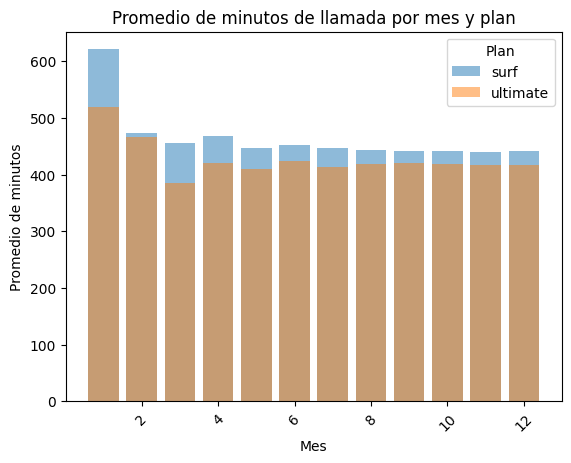

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_calls_per_plan_month = user_monthly_df.groupby(['plan', 'month'])['call_minutes'].mean().reset_index()
print(avg_calls_per_plan_month)

for plan in avg_calls_per_plan_month['plan'].unique():
    plan_data = avg_calls_per_plan_month[avg_calls_per_plan_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['call_minutes'], label=plan, alpha = 0.5)

plt.title('Promedio de minutos de llamada por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de minutos')
plt.xticks(rotation=45) 
plt.legend(title='Plan')


plt.show()




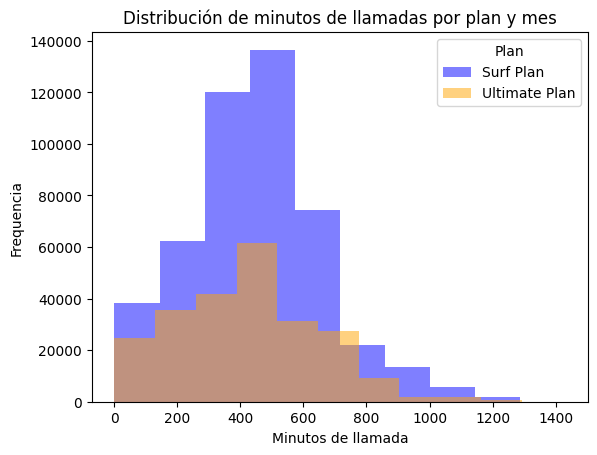

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_call_minutes = user_monthly_df[user_monthly_df['plan'] == 'surf']['call_minutes']
ultimate_call_minutes = user_monthly_df[user_monthly_df['plan'] == 'ultimate']['call_minutes']


plt.hist(surf_call_minutes, alpha=0.5, label='Surf Plan', color='blue')

plt.hist(ultimate_call_minutes, alpha=0.5, label='Ultimate Plan', color='orange')

plt.title('Distribución de minutos de llamadas por plan y mes')
plt.xlabel('Minutos de llamada')
plt.ylabel('Frequencia')
plt.legend(title='Plan')

plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
print('La media de minutos utilizados al mes por los usuarios del plan surf es', surf_call_minutes.mean())


print('La varianza de los minutos utilizados al mes por usuarios surf es de: ', np.var(surf_call_minutes))

print('La media de minutos utilizados al mes por los usuarios del plan ultimate es', ultimate_call_minutes.mean())


print('La varianza de los minutos utilizados al mes por usuarios ultimate es de: ', np.var(ultimate_call_minutes))


La media de minutos utilizados al mes por los usuarios del plan surf es 447.3255798274286
La varianza de los minutos utilizados al mes por usuarios surf es de:  46077.915765000296
La media de minutos utilizados al mes por los usuarios del plan ultimate es 420.28757931685675
La varianza de los minutos utilizados al mes por usuarios ultimate es de:  51083.7196206861


El plan surf incluye 500 minutos de llamadas, el promedio de uso mensual para este plan es de 447.33 minutos, por lo que los clientes estan utilizando la mayoría de sus minutos disponibles, o aún más. Esto lo podemos ver en el histograma de arriba, ya que hay muchos usuarios del plan surf que se encuentran en el lado derecho de la distribución, indicando que con frecuencia utilizan más de los 500 minutos.

El plan ultimate incluye 3,000 minutos de llamadas, sin embargo, el promedio de uso no cambia mucho rsi lo comparamos con el plan surf. Aqui podemos ver que el promedio de minutos utilizados al mes es un poco más bajo, en 420.23 minutos.

También es importante considerar la cantidad de usuarios que tienen un plan u el otro, ya que puede afectar la apariencia de nuestros histogramas. Sin embargo vemos que los valores con mayor frecuencia en ambos casos se encuentran alrededor de los 400 minutos.

Text(0.5, 1.0, 'Distribución de los minutos de llamadas de usuarios de Surf')

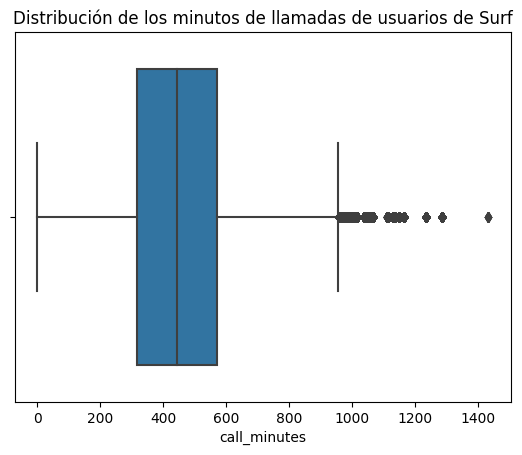

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(surf_call_minutes).set_title('Distribución de los minutos de llamadas de usuarios de Surf')


Podemos ver en el diagrama de caja que el 50% de los datos se encuentran por debajo de los 500 minutos al mes que incluye el plan. También podemos ver que hay muchos valores atípicos de más de 1000 minutos, lo que puede dar una explicación de por qué se eleva el valor de la media y la varianza.

Text(0.5, 1.0, 'Distribución de los minutos de llamadas de usuarios de Ultimate')

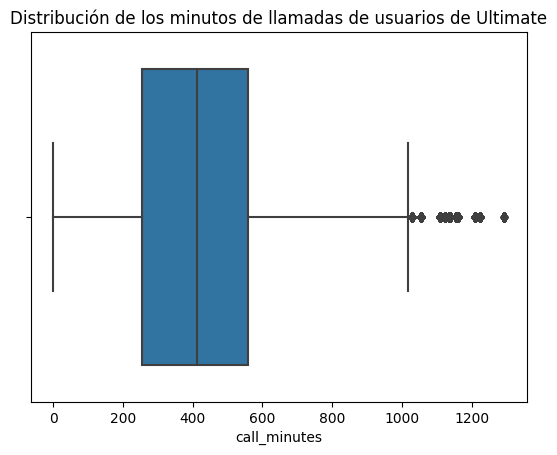

In [35]:
sns.boxplot(ultimate_call_minutes).set_title('Distribución de los minutos de llamadas de usuarios de Ultimate')


En este otro diagrama, para el plan ultimate, podemos ver que la mediana es un poco más elevada que en el plan surf. La caja es un poco más gruesa y también tenemos valores atípicos que pueden elevar el valor de la media y la varianza. Sin embargo, ya que este plan incluye 3,000 minutos, ningún usuario está utilizando todos los minutos de su plan.

### Mensajes

        plan  month  number_of_messages
0       surf      1           56.000000
1       surf      2           35.873369
2       surf      3           31.168494
3       surf      4           36.069636
4       surf      5           37.029162
5       surf      6           36.360278
6       surf      7           36.642653
7       surf      8           37.188095
8       surf      9           37.409008
9       surf     10           37.500035
10      surf     11           37.576044
11      surf     12           37.995314
12  ultimate      1           36.805556
13  ultimate      2           34.540344
14  ultimate      3           35.653059
15  ultimate      4           45.397074
16  ultimate      5           44.694356
17  ultimate      6           44.900928
18  ultimate      7           45.424522
19  ultimate      8           45.599962
20  ultimate      9           45.908274
21  ultimate     10           46.742000
22  ultimate     11           46.820729
23  ultimate     12           46.826152


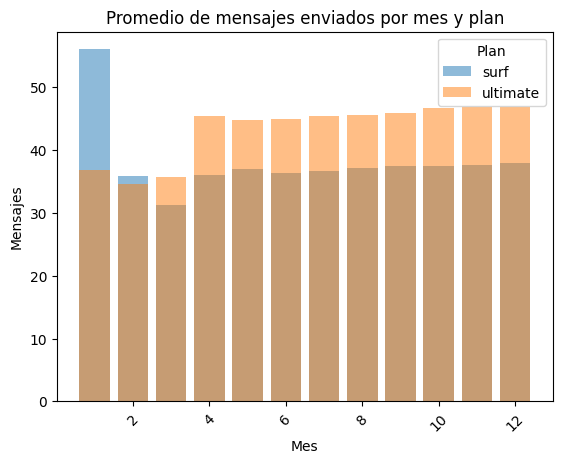

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages_per_plan_month = user_monthly_df.groupby(['plan', 'month'])['number_of_messages'].mean().reset_index()
print(avg_messages_per_plan_month)

for plan in avg_messages_per_plan_month['plan'].unique():
    plan_data = avg_messages_per_plan_month[avg_messages_per_plan_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['number_of_messages'], label=plan, alpha = 0.5)

plt.title('Promedio de mensajes enviados por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Mensajes')
plt.xticks(rotation=45) 
plt.legend(title='Plan')


plt.show()


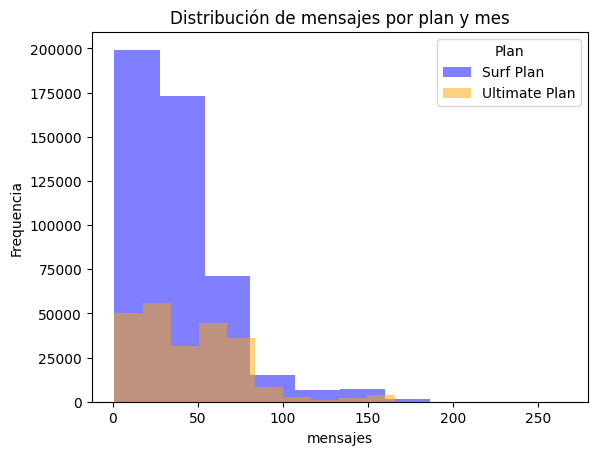

In [37]:

surf_messages = user_monthly_df[user_monthly_df['plan'] == 'surf']['number_of_messages']
ultimate_messages = user_monthly_df[user_monthly_df['plan'] == 'ultimate']['number_of_messages']


plt.hist(surf_messages, alpha=0.5, label='Surf Plan', color='blue')

plt.hist(ultimate_messages, alpha=0.5, label='Ultimate Plan', color='orange')

plt.title('Distribución de mensajes por plan y mes')
plt.xlabel('mensajes')
plt.ylabel('Frequencia')
plt.legend(title='Plan')

plt.show()

In [38]:
print('La media de mensajes enviados al mes por los usuarios del plan surf es', surf_messages.mean())


print('La varianza de los mensajes enviados al mes por usuarios surf es de: ', np.var(surf_messages))

print('La media de mensajes enviados al mes por los usuarios del plan ultimate es', ultimate_messages.mean())


print('La varianza de los mensajes enviados al mes por usuarios ultimate es de: ', np.var(ultimate_messages))


La media de mensajes enviados al mes por los usuarios del plan surf es 36.98408072742466
La varianza de los mensajes enviados al mes por usuarios surf es de:  853.5338757330434
La media de mensajes enviados al mes por los usuarios del plan ultimate es 44.95224263569502
La varianza de los mensajes enviados al mes por usuarios ultimate es de:  955.9734023139309


Text(0.5, 1.0, 'Distribución de los mensajes de usuarios de Surf')

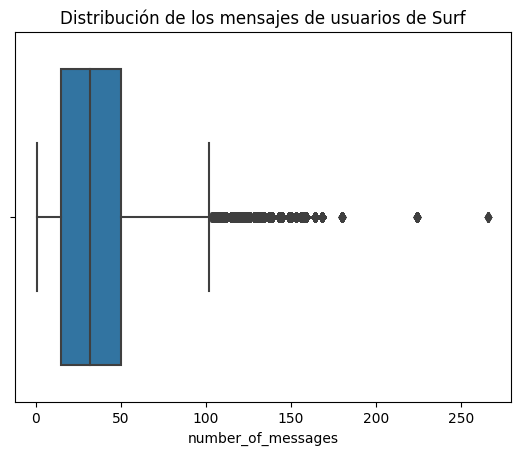

In [39]:
sns.boxplot(surf_messages).set_title('Distribución de los mensajes de usuarios de Surf')

Text(0.5, 1.0, 'Distribución de los mensajes de usuarios de Ultimate')

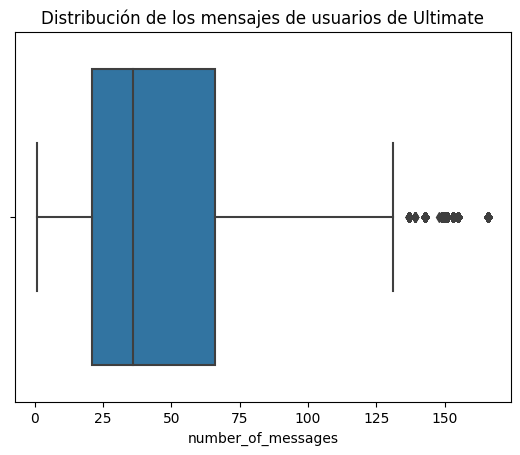

In [40]:
sns.boxplot(ultimate_messages).set_title('Distribución de los mensajes de usuarios de Ultimate')


El plan surf incluye 50 sms, podemos ver que el promedio de mensajes enviados al mes por usuarios de surf es de 37, y en el diagrama de caja podemos ver que el tercer quartil coincide con el 50, lo que nos quiere indicar que el 75% de nuestros usuarios utilizan 50 mensajes o menos al mes. En el histograma podemos ver que los valores con más frecuencia son los que se encuentran entre 25-50 mensajes al mes para éste plan. Sin embargo también podemos observar que hay valores que son atípicos y se salen del rango, es probable que éstos usarios puedan preferir cambiar al plan ultimate para que cumplan con su uso regular y tengan mayor nivel de saritisfacción. Estos valores fuera de rango son los que elevan el valor de la varianza.

El plan ultimate incluye 1,000 sms y podemos ver que no hay usuarios que utilizan todos los mensajes de su plan. Sin embargo, sí utilizan más mensajes que los usuarios de surf. Esto se ve claramente en el primer gráfico de la sección en la que las barras para ultimate son consistentemente más altas que las de surf. En estos datos la media es más alta, siendo de 45 mensajes promedio al mes, y también encontramos una varianza más alta ya que hay un rango más grande de datos.

### Internet

        plan  month       mb_used
0       surf      1  13801.314167
1       surf      2  15975.103474
2       surf      3  16513.759094
3       surf      4  16644.322870
4       surf      5  16641.907188
5       surf      6  16853.886434
6       surf      7  16829.197868
7       surf      8  16928.087422
8       surf      9  16898.012963
9       surf     10  16870.173307
10      surf     11  16906.121779
11      surf     12  16898.389800
12  ultimate      1  19512.131389
13  ultimate      2  19735.772752
14  ultimate      3  20975.734815
15  ultimate      4  20186.535571
16  ultimate      5  19860.160241
17  ultimate      6  19142.322824
18  ultimate      7  18921.458679
19  ultimate      8  18733.765681
20  ultimate      9  18714.964674
21  ultimate     10  18723.593612
22  ultimate     11  18745.652926
23  ultimate     12  18745.670211


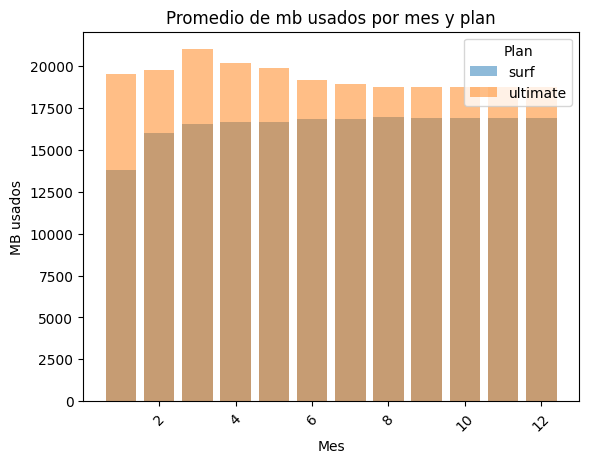

In [41]:
avg_internet_per_plan_month = user_monthly_df.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
print(avg_internet_per_plan_month)

for plan in avg_internet_per_plan_month['plan'].unique():
    plan_data = avg_internet_per_plan_month[avg_internet_per_plan_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['mb_used'], label=plan, alpha = 0.5)

plt.title('Promedio de mb usados por mes y plan')
plt.xlabel('Mes')
plt.ylabel('MB usados')
plt.xticks(rotation=45) 
plt.legend(title='Plan')


plt.show()


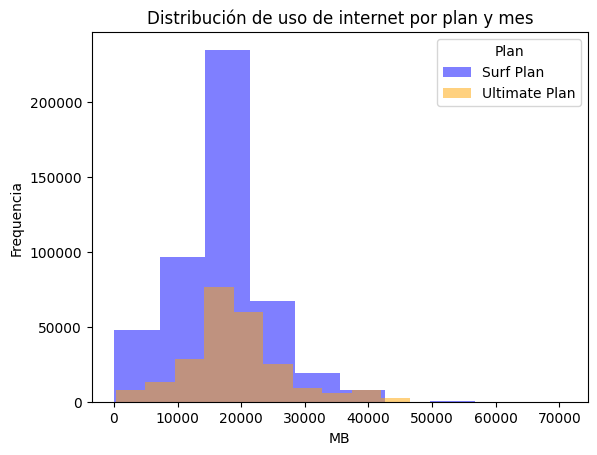

In [42]:
surf_internet = user_monthly_df[user_monthly_df['plan'] == 'surf']['mb_used']
ultimate_internet = user_monthly_df[user_monthly_df['plan'] == 'ultimate']['mb_used']


plt.hist(surf_internet, alpha=0.5, label='Surf Plan', color='blue')

plt.hist(ultimate_internet, alpha=0.5, label='Ultimate Plan', color='orange')

plt.title('Distribución de uso de internet por plan y mes')
plt.xlabel('MB')
plt.ylabel('Frequencia')
plt.legend(title='Plan')

plt.show()

In [43]:
print('La media de mb usados al mes por los usuarios del plan surf es', surf_internet.mean())

print('La varianza de los mb usados al mes por usuarios surf es de: ', np.var(surf_internet))

print('La media de mb usados al mes por los usuarios del plan ultimate es', ultimate_internet.mean())

print('La varianza de los mb usados al mes por usuarios ultimate es de: ', np.var(ultimate_internet))


La media de mb usados al mes por los usuarios del plan surf es 16808.58100917722
La varianza de los mb usados al mes por usuarios surf es de:  50146163.8886085
La media de mb usados al mes por los usuarios del plan ultimate es 19107.868789319695
La varianza de los mb usados al mes por usuarios ultimate es de:  60541086.77931137


Text(0.5, 1.0, 'Distribución de los mb usados por usuarios de Surf')

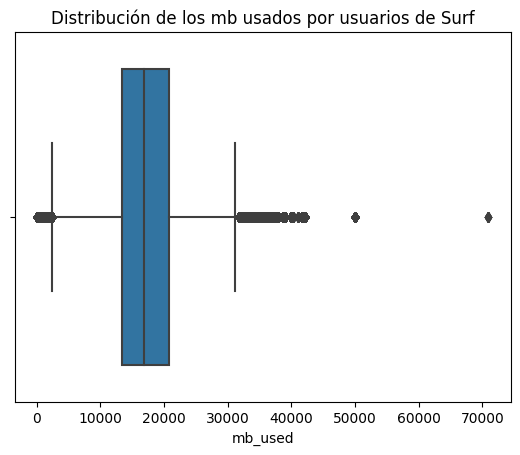

In [44]:
sns.boxplot(surf_internet).set_title('Distribución de los mb usados por usuarios de Surf')

Text(0.5, 1.0, 'Distribución de los mb usados por usuarios de Ultimate')

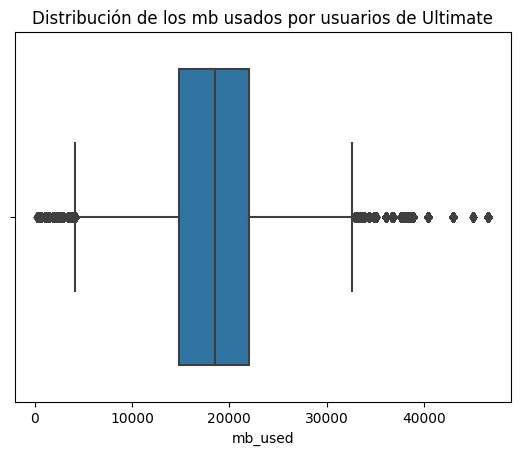

In [45]:
sns.boxplot(ultimate_internet).set_title('Distribución de los mb usados por usuarios de Ultimate')

El plan de surf incluye 15 GB, lo que es equivalente a 15360 mb de datos. El promedio de uso de datos para usuarios surf es de 16808, por lo que el promedio se excede casi por 1 gb de lo incluido en el plan. En el gráfico de barras podemos ver que los clientes de surf por lo general utilizan en promedio más del internet incluido en su plan, lo que resulta en cuotas extras. Podemos ver en el histograma que la frecuencia más alta es la del uso de alrededor de 20,000 mb, lo cual también excede lo incluido en el plan. También hay que tomar en cuenta que tenemos valores muy atípicos en este conjunto, como podemos observar en el diagrama de caja. Esto hace que la varianza se eleve mucho. En cuanto a la media, esta se ve afectada tanto por valores atípicos más altos y más bajos, y el valor de la mediana lo encontramos alrededor de los 15,000 mb. Estos datos nos ayudan a plantear la pregunta de por qué si los clientes se exceden del plan en muchas ocaciones, prefieren pagar las cuotas extra a contratar el siguiente plan.

El plan ultimate incluye 30 GB que son 30720 mb. En promedio se utilizan 19107 mb al mes, lo cual es por debajo de lo incuido en el plan. En la gráfica de barras podemos observar que se mantiene alrededor de los 20,000 mb al mes. En el histograma podemos reiterar esto, ya que la mayor frecuencia se da en los valores de entre 15,000 a 20,000 mb mensuales, aunque en el histograma también podemos observar una mayor frecuencia en valores de hasta más de 40,000 mb mensuales, lo que sí excede el plan. Estos valores también los vemos como valores atípicos en el diagrama de caja y se reflejan también en el valor de la varianza. En el diagrama de caja podemos ver que la mayor parte de los usuarios se encuentran dentro del límite establecido, ya que el límite superior o Q4 apenas supera los 30,00 mb. Sin embargo sí encontramos usuarios que exceden el límite del plan y que tienen cargos extras.




## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

        plan  month  total_due
0       surf      1  28.851183
1       surf      2  40.686089
2       surf      3  51.967956
3       surf      4  53.288089
4       surf      5  54.021068
5       surf      6  56.126001
6       surf      7  56.154326
7       surf      8  57.039384
8       surf      9  56.881962
9       surf     10  56.818048
10      surf     11  57.114465
11      surf     12  57.080252
12  ultimate      1  70.046851
13  ultimate      2  70.058357
14  ultimate      3  76.096341
15  ultimate      4  74.915011
16  ultimate      5  74.465517
17  ultimate      6  73.651189
18  ultimate      7  73.357696
19  ultimate      8  73.213548
20  ultimate      9  73.164114
21  ultimate     10  73.248929
22  ultimate     11  73.279830
23  ultimate     12  73.278106


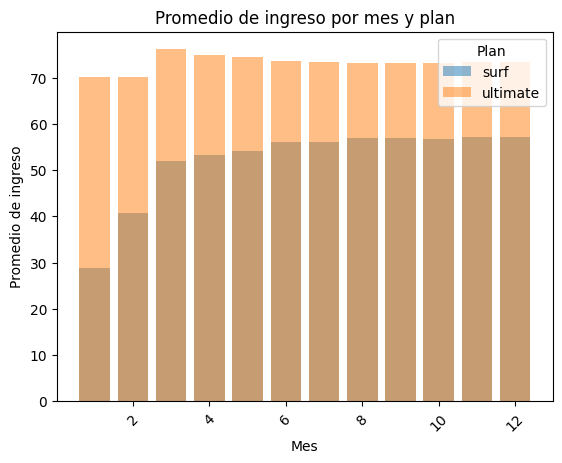

In [46]:
avg_income_per_plan_month = user_monthly_df.groupby(['plan', 'month'])['total_due'].mean().reset_index()
print(avg_income_per_plan_month)

for plan in avg_income_per_plan_month['plan'].unique():
    plan_data = avg_income_per_plan_month[avg_income_per_plan_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['total_due'], label=plan, alpha = 0.5)

plt.title('Promedio de ingreso por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de ingreso')
plt.xticks(rotation=45) 
plt.legend(title='Plan')


plt.show()

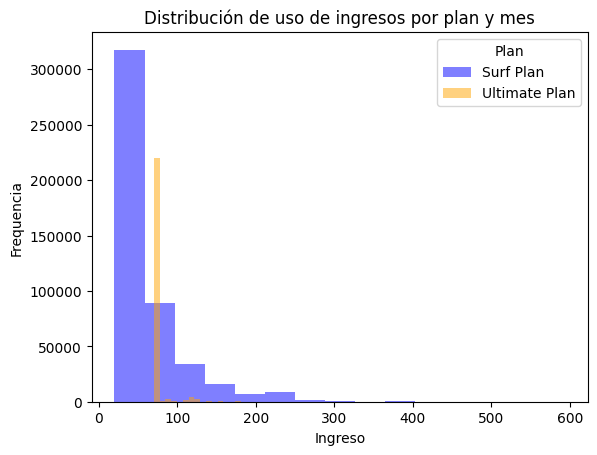

In [47]:
surf_income = user_monthly_df[user_monthly_df['plan'] == 'surf']['total_due']
ultimate_income = user_monthly_df[user_monthly_df['plan'] == 'ultimate']['total_due']


plt.hist(surf_income, bins = 15, alpha=0.5, label='Surf Plan', color='blue')

plt.hist(ultimate_income, bins = 15, alpha=0.5, label='Ultimate Plan', color='orange')

plt.title('Distribución de uso de ingresos por plan y mes')
plt.xlabel('Ingreso')
plt.ylabel('Frequencia')
plt.legend(title='Plan')

plt.show()

In [48]:
print('La media de ingreso al mes por los usuarios del plan surf es', surf_income.mean())
print('La el valor máximo de ingreso del plan surf es', surf_income.max())
print('La el valor ingresos totales del plan surf es', surf_income.sum())


print('La varianza de los ingreso al mes por usuarios surf es de: ', np.var(surf_income))

print('La media de ingreso al mes por los usuarios del plan ultimate es', ultimate_income.mean())
print('La el valor máximo de ingreso del plan ultimate es', ultimate_income.max())
print('La el valor ingresos totales del plan ultimate es', ultimate_income.sum())

print('La varianza de los ingreso al mes por usuarios ultimate es de: ', np.var(ultimate_income))

La media de ingreso al mes por los usuarios del plan surf es 55.77045028287095
La el valor máximo de ingreso del plan surf es 594.3530999999999
La el valor ingresos totales del plan surf es 26429114.454999994
La varianza de los ingreso al mes por usuarios surf es de:  2363.3170348067083
La media de ingreso al mes por los usuarios del plan ultimate es 73.44049600432734
La el valor máximo de ingreso del plan ultimate es 181.1273099999999
La el valor ingresos totales del plan ultimate es 17344662.26283
La varianza de los ingreso al mes por usuarios ultimate es de:  200.22504922496793


Text(0.5, 1.0, 'Distribución de ingresos por usuarios de Surf')

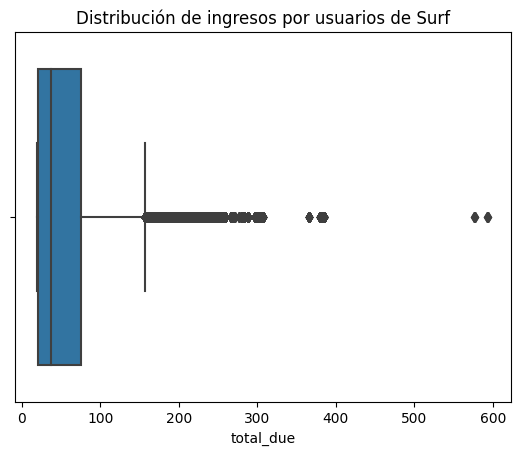

In [49]:
sns.boxplot(surf_income).set_title('Distribución de ingresos por usuarios de Surf')

Text(0.5, 1.0, 'Distribución de ingresos por usuarios de Ultimate')

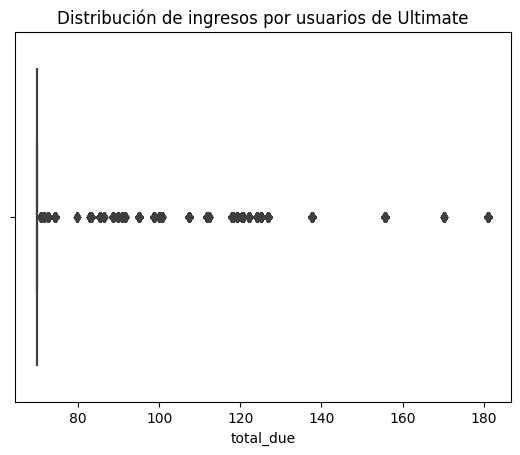

In [50]:
sns.boxplot(ultimate_income).set_title('Distribución de ingresos por usuarios de Ultimate')

El plan surf cuesta 20 al mes, sin embargo vemos que en promedio los usuarios pagan $55 al mes por los cargos extras. A partir de los análisis anteriores podemos pensar que la mayor parte de los extras vienen de consumo de internet, ya que tanto en llamadas como mensajes los usuarios suelen quedarse dentro de los límites del plan. En el primer gráfico de barras podemos ver que en ningun mes el promedio de ingreso por el plan surf es de 20 o menor, lo que nos indica que cada mes se están generando ingresos de los servicios extras. En el histograma podemos ver que con mayor frecuencia los usuarios de surf pagan menos de 70 al mes, por lo que a pesar de pagar consumo extra en cualquiera de los servicios, siguen prefiriendo este plan. Sin embargo también vemos que hay muchos usuarios de este plan que pagan por encima incluso del plan ultimate por su consumo extra, siendo el valor máximo 594. En el gráfico de caja podemos ver que la mayoría de los clientes pagan menos de 150, y la mediana se encuentra alrededor de 20, el valor base del plan. La el valor ingresos totales del plan surf fue de 26,429,114.45.

El plan ultimate cuesta $70, y la mayor parte de los clientes se mantienen dentro de los parámetros de su plan por lo que el valor con más frecuencia (como podemos ver en el histograma) es de 70, y son menos clientes los que pagan cargos extras comparados con los usuarios del plan surf. El promedio de pago de los clientes ultimates es de 73, y vemos en el diagrama de caja que hay valores atípicos que pueden elevar esta media, ya que en el mismo podemos ver que casi todos los valores se encuentran en una línea recta sobre el 70. La el valor ingresos totales del plan ultimate es 17,344,662.26.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>

¡Felicidades por completar esta sección con éxito! Has hecho un gran trabajo. Los valores esperados para esta sección se han cumplido con éxito gracias a tu dedicación y esfuerzo. Continúa así y sigue aprendiendo, ¡estoy seguro de que tendrás éxito en todo lo que te propongas!</div>


## Prueba las hipótesis estadísticas


Hipótesis: Los ingresos promedio de los usuarios de los planes "Ultimate" y "Surf" son diferentes.


Hipótesis nula: Los ingresos promedio de los usuarios de los planes "Ultimate" y "Surf" son iguales.


Vamos a realizar una prueba t de dos muestras con varianzas diferentes, las cuales ya se calcularon anteriormente

In [51]:
# Prueba las hipótesis
    
    
results = st.ttest_ind(ultimate_income , surf_income, equal_var = False)

print('valor p:', results.pvalue)

alfa = 0.05
if ( results.pvalue < alfa) :
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.0
Rechazamos la hipótesis nula



Hipótesis: Los ingresos promedio de los usuarios del área NY-NJ y el resto son diferentes.


Hipótesis nula:  Los ingresos promedio de los usuarios del área NY-NJ y el resto son iguales.


In [52]:
ny_nj_df = users_df[users_df['city'].str.contains('NY-NJ')]
ny_nj_df = ny_nj_df.merge(user_monthly_df, on = 'user_id').reset_index()

other_regions_df = users_df[~users_df['city'].str.contains('NY-NJ')]
other_regions_df = other_regions_df.merge(user_monthly_df, on = 'user_id').reset_index()

print('La varianza de los ingreso al mes por usuarios de NY-NJ es de: ', np.var(ny_nj_df['total_due']))
print('La varianza de los ingreso al mes por usuarios otras regiones es de: ', np.var(other_regions_df['total_due']))

results = st.ttest_ind(ny_nj_df['total_due'] , other_regions_df['total_due'], equal_var = False)

print('valor p:', results.pvalue)

alfa = 0.05
if ( results.pvalue < alfa) :
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

La varianza de los ingreso al mes por usuarios de NY-NJ es de:  1340.511460059503
La varianza de los ingreso al mes por usuarios otras regiones es de:  1761.9463968026294
valor p: 0.0
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Muy buen uso de la prueba de hipótesis para comparar los ingresos entre los planes. Has aplicado correctamente la prueba t y presentado las conclusiones de manera clara y concisa.
</div>

Conclusiones Generales

En el previo análisis se puede observar el comportamiento de los clientes de la empresa. Se analizaron los datos conforme al plan que contrataron los usuarios y su comportamiento a lo largo del año. En cuanto a llamadas y mensajes, por lo general las necesidades de los clientes están cubiertas ya que no se suelen exceder de los límites de los planes, sin embargo en el consumo de internet es diferente. Por lo general, vemos que los usuarios del plan surf exceden el internet incluido en su plan, sin embargo cuando analizamos cuánto están pagando por este servicio extra, en promedio es menos que lo que pagarían por subir de categoría al plan ultimate. Esto podría explicar porqué a pesar de consumir extras se quedan con éste plan.

En el plan ultimate, la mayor parte de los clientes están conformes con lo que se incluye en su plan, ya que son atípicos los que se exceden de cualquier forma. 

También se observó que el plan surf genera más ingresos, con un total de 26,429,114.45 mientras que el plan ultimate genera 17,344,662.26. Podemos interpretar que a pesar de que el plan surf es más económico, por el volumen de su venta y el consumo extra que tienen los clientes en el cual el costo es más alto que los extras de ultimete, genera más el plan surf. 

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Al escribir conclusiones finales, consiguiera las siguientes pauta para que reflejen efectivamente tus hallazgos y decisiones. 
<ul>
    <li><b>Resumen de los Hallazgos Clave:</b> Incluye brevemente tus descubrimientos más importantes.</li>
    <li><b>Impacto de tus Elecciones de Procesamiento de Datos:</b> Reflexiona sobre cómo tus decisiones influyeron en los resultados.</li>
    <li><b>Relación con los Objetivos Iniciales:</b> Vincula tus hallazgos con los objetivos del proyecto.</li>
    <li><b>Relevancia de los Hallazgos:</b> Discute la importancia de tus resultados para la empresa o usuarios.</li>
    <li><b>Sugerencias y Recomendaciones:</b> Ofrece cualquier consejo basado en tus análisis.</li>
    <li><b>Reflexiones Finales:</b> Concluye con tus pensamientos finales y aprendizajes del proyecto.</li>
</ul>
Recuerda que una conclusión efectiva resume tus hallazgos y proporciona insights y reflexiones sobre su impacto y relevancia. ¡Buena suerte en la etapa final!
</div>


### Comentario Final del Revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos y has aplicado un análisis sólido para llegar a conclusiones relevantes. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:
- **Carga y preparación de los datos:** Hiciste un gran trabajo al organizar y transformar los datos. La corrección de los tipos de datos y la agrupación de los mismos fue muy precisa.
- **Análisis de ingresos y comportamiento de los usuarios:** Tus comparaciones entre los planes y el análisis del consumo de servicios adicionales, especialmente en el uso de internet, fue muy detallado y bien respaldado por visualizaciones.
- **Prueba de hipótesis:** Implementaste pruebas estadísticas correctamente y llegaste a conclusiones significativas sobre las diferencias entre los planes.

#### Áreas para Seguir Investigando:
- **Visualización de datos:** Podrías ampliar el uso de gráficos para explorar más patrones en los datos, como la variabilidad regional en los ingresos o la distribución de usuarios por ciudad.
- **Análisis de segmentación de usuarios:** Explora técnicas de **clustering** o **segmentación de mercado** para identificar diferentes perfiles de usuarios, lo cual podría ayudar a la empresa a personalizar sus planes.
- **Optimización del código:** Profundiza en el uso de **funciones vectorizadas** en Pandas para optimizar el procesamiento de datos y reducir la complejidad de las funciones `apply`.

¡Sigue adelante! Tu progreso es notable y tienes un gran futuro en el análisis de datos. 🚀💪😊
</div>
